In [2191]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2193]:

df = pd.read_csv(r"C:\Users\gebruiker\IH_LESSONS\Projects\labor_cost_da\Percentage_wage_cost_per_department.csv", index_col=0)
df.head()

,Wed 1 Jan 20,Thu 2 Jan 20,Fri 3 Jan 20,Sat 4 Jan 20,Sun 5 Jan 20,Mon 6 Jan 20,Tue 7 Jan 20,Wed 8 Jan 20,Thu 9 Jan 20,Fri 10 Jan 20,...,Sun 25 May 25,Mon 26 May 25,Tue 27 May 25,Wed 28 May 25,Thu 29 May 25,Fri 30 May 25,Sat 31 May 25,Average,Last year,Cummulative
Bediening,17,9,15,12,11,12,18,17,17,15,...,10,13,16,13,14,11,11,11,11,11
Facilitair,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Facilitair,0,0,0,0,0,2,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
Keuken,12,8,8,9,9,11,14,13,12,9,...,9,9,10,10,11,7,7,15,15,15
Management,0,0,0,0,1,0,0,6,0,0,...,0,2,2,2,1,0,1,1,1,1


In [2195]:
df = df.T
df = df.reset_index()
df.rename(columns={'index': 'date'}, inplace=True)
df.head()

,date,Bediening,Facilitair,Facilitair,Keuken,Management,Spoelkeuken,Total
0,Wed 1 Jan 20,17,0,0,12,0,3,31
1,Thu 2 Jan 20,9,0,0,8,0,2,20
2,Fri 3 Jan 20,15,0,0,8,0,2,26
3,Sat 4 Jan 20,12,0,0,9,0,2,23
4,Sun 5 Jan 20,11,0,0,9,1,2,24


In [2197]:
print(df.columns.tolist())

['date', 'Bediening', 'Facilitair', 'Facilitair', 'Keuken', 'Management', 'Spoelkeuken', 'Total']


In [2199]:
df.reset_index(drop=True, inplace=True)
df

,date,Bediening,Facilitair,Facilitair,Keuken,Management,Spoelkeuken,Total
0,Wed 1 Jan 20,17,0,0,12,0,3,31
1,Thu 2 Jan 20,9,0,0,8,0,2,20
2,Fri 3 Jan 20,15,0,0,8,0,2,26
3,Sat 4 Jan 20,12,0,0,9,0,2,23
4,Sun 5 Jan 20,11,0,0,9,1,2,24
...,...,...,...,...,...,...,...,...
1976,Fri 30 May 25,11,0,0,7,0,3,22
1977,Sat 31 May 25,11,0,0,7,1,4,23
1978,Average,11,0,0,15,1,10,38
1979,Last year,11,0,0,15,1,10,37


In [2201]:
# Drop the columns that is reference to the previus df columns ,Average, Last year,	Cummulative
df.drop([1978, 1979, 1980], inplace=True)

In [2203]:
df.drop(columns=['Facilitair','Management', 'Total'], inplace=True)
df.head()

,date,Bediening,Keuken,Spoelkeuken
0,Wed 1 Jan 20,17,12,3
1,Thu 2 Jan 20,9,8,2
2,Fri 3 Jan 20,15,8,2
3,Sat 4 Jan 20,12,9,2
4,Sun 5 Jan 20,11,9,2


In [2205]:
df.rename(columns={
    'Bediening': 'service',
    'Keuken': 'kitchen',
    'Spoelkeuken': 'dishwasher'
}, inplace=True)
df.head()

,date,service,kitchen,dishwasher
0,Wed 1 Jan 20,17,12,3
1,Thu 2 Jan 20,9,8,2
2,Fri 3 Jan 20,15,8,2
3,Sat 4 Jan 20,12,9,2
4,Sun 5 Jan 20,11,9,2


In [2207]:
# Retrieving the number of rows and columns in the dataframe
df.shape

(1978, 4)

In [2209]:
# Displaying the data types of each column in the dataframe
df.dtypes

date          object
service        int64
kitchen        int64
dishwasher     int64
dtype: object

In [2211]:
# Convert to datetime, ignoring errors
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Now, 'date' is of type datetime64[ns]
print(df['date'].dtype)
print(df.head())

datetime64[ns]
        date  service  kitchen  dishwasher
0 2020-01-01       17       12           3
1 2020-01-02        9        8           2
2 2020-01-03       15        8           2
3 2020-01-04       12        9           2
4 2020-01-05       11        9           2


In [2213]:
# Displaying the data types of each column in the dataframe
df.dtypes

date          datetime64[ns]
service                int64
kitchen                int64
dishwasher             int64
dtype: object

In [2215]:
# Check original dtype
print("Original dtype:", df['date'].dtype)

# Convert to datetime, coercing errors
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Verify conversion
print("Converted dtype:", df['date'].dtype)

# Format as string in day/month/year
df['date'] = df['date'].dt.strftime('%d/%m/%Y')

# Display first few rows
print(df.head())

Original dtype: datetime64[ns]
Converted dtype: datetime64[ns]
         date  service  kitchen  dishwasher
0  01/01/2020       17       12           3
1  02/01/2020        9        8           2
2  03/01/2020       15        8           2
3  04/01/2020       12        9           2
4  05/01/2020       11        9           2


In [2217]:
# Retrieving the unique data types present in the dataframe columns
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O')]

In [2219]:
# Extracting column names with numerical data types from the dataframe
df.select_dtypes("number").columns

Index(['service', 'kitchen', 'dishwasher'], dtype='object')

In [2221]:
# Counting and sorting the unique values for each numerical column in descending order
df.select_dtypes("number").nunique().sort_values(ascending=False)

kitchen       96
dishwasher    63
service       39
dtype: int64

In [2223]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

date          0
service       0
kitchen       0
dishwasher    0
dtype: int64

In [2225]:
#finding a variations in a column education
df_count = df[['service', 'kitchen', 'dishwasher']].value_counts()
df_count

service  kitchen  dishwasher
0        0        0             312
9        8        3              18
                  2              17
13       7        5              15
7        8        2              15
                               ... 
12       12       10              1
                  9               1
                  8               1
                  2               1
239      222      0               1
Name: count, Length: 751, dtype: int64

In [2227]:
#Drop rows where all values are zero across all columns
#columns_to_check = ['service', 'kitchen', 'dishwasher']
#df = df[(df[columns_to_check] != 0).any(axis=1)]
#df.shape

In [2229]:
# Summary statistics for the dataset
#df.describe(include = "object").T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
service,1978.0,10.384226,8.946251,0.0,7.0,11.0,13.0,239.0
kitchen,1978.0,15.581901,43.969786,0.0,6.0,8.0,10.0,533.0
dishwasher,1978.0,7.801820,24.936625,0.0,2.0,4.0,5.0,266.0


In [2231]:
# Select only integer columns
int_cols = df.select_dtypes(include='int').columns

# Keep only rows where all integer columns are >= 0
df = df[(df[int_cols] >= 0).all(axis=1)]
df.shape

(1978, 4)

In [2233]:
df.to_csv('labor_percentage.csv', index=False)

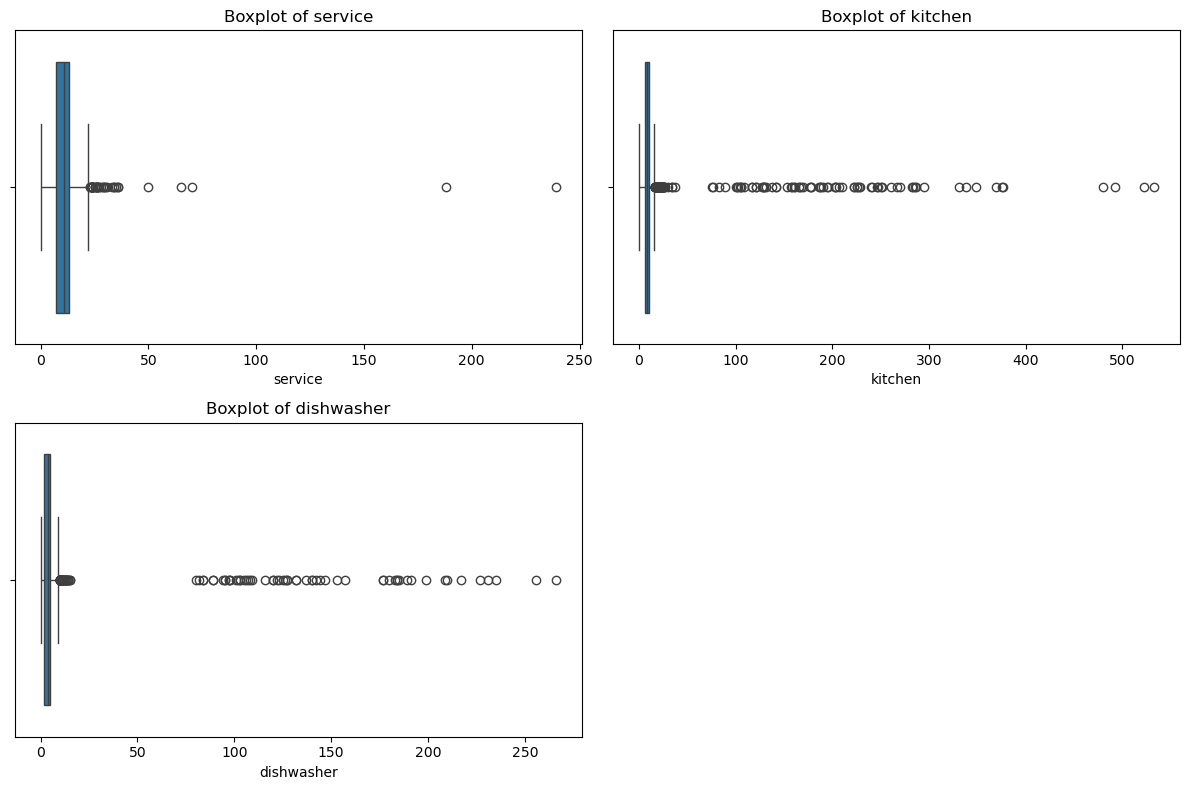

In [2235]:
# List of columns to visualize, Box plots
columns = ['service', 'kitchen', 'dishwasher']

plt.figure(figsize=(12, 8))
for i, col in enumerate(columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

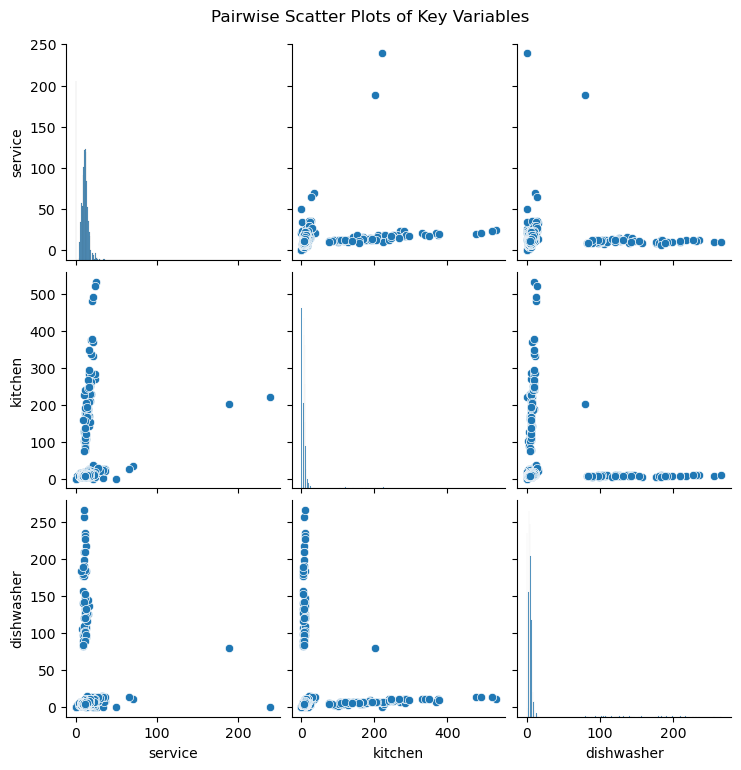

In [2237]:
# Pairwise scatter plots
sns.pairplot(df[columns])
plt.suptitle('Pairwise Scatter Plots of Key Variables', y=1.02)
plt.show()

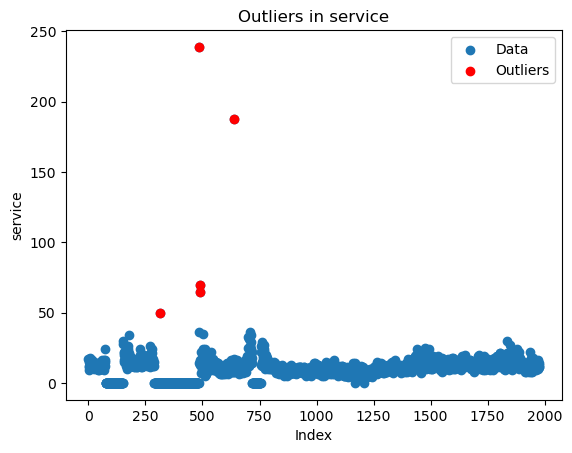

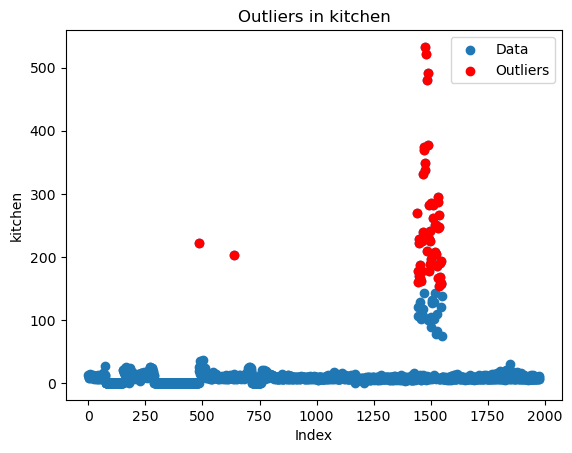

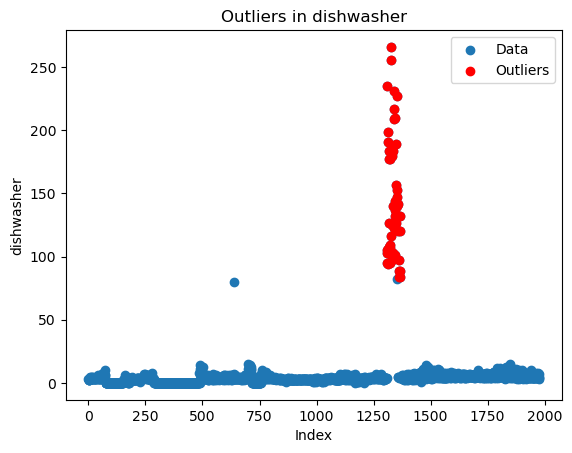

In [2238]:
# Outlier Detection with Z-scores
for col in columns:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = df[z_scores > 3]
    plt.scatter(df.index, df[col], label='Data')
    plt.scatter(outliers.index, outliers[col], color='r', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Outliers in {col}')
    plt.legend()
    plt.show()

In [2241]:
# For 'service'
mean_service = df.loc[df['service'] <= 40, 'service'].median()
df.loc[df['service'] > 40, 'service'] = mean_service

# For 'kitchen'
mean_kitchen = df.loc[df['kitchen'] <= 40, 'kitchen'].median()
df.loc[df['kitchen'] > 40, 'kitchen'] = mean_kitchen

#For 'dishwasher'
mean_dishwasher = df.loc[df['dishwasher'] <= 30, 'dishwasher'].median()
df.loc[df['dishwasher'] > 30, 'dishwasher'] = mean_dishwasher

In [2243]:
# Set threshold
threshold = 3

# Cap values at threshold
df[col] = np.where(z_scores > threshold, df[col].median() + threshold * df[col].std(), df[col])

In [2245]:
for col in int_cols:
    # Calculate z-scores
    z_scores = np.abs(stats.zscore(df[col]))
    
    # Identify outliers 
    outliers_mask = z_scores > 2.5
    
    # Count outliers before capping
    num_outliers_before = np.sum(outliers_mask)
    print(f"{col} - Outliers before capping: {num_outliers_before}")
    
    # Cap the outliers
    # Replace outliers with threshold
    threshold_value = df[col].median() + 2.5 * df[col].std()
    df[col] = np.where(outliers_mask, threshold_value, df[col])
    
    # Recalculate z-scores after capping if needed
    z_scores_after = np.abs(stats.zscore(df[col]))
    outliers_after = np.sum(z_scores_after > 2.5)
    print(f"{col} - Outliers after capping: {outliers_after}")

service - Outliers before capping: 22
service - Outliers after capping: 22
kitchen - Outliers before capping: 38
kitchen - Outliers after capping: 49
dishwasher - Outliers before capping: 73
dishwasher - Outliers after capping: 85


In [2247]:
columns = ['service', 'kitchen', 'dishwasher']

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}:")
    print(outliers)
    print("\n")

Outliers in service:
            date    service   kitchen  dishwasher
74    15/03/2020  24.000000  19.64697   10.000000
152   01/06/2020  25.461783  19.64697    2.000000
153   02/06/2020  25.461783  19.64697    1.000000
174   23/06/2020  25.461783   8.00000    0.000000
175   24/06/2020  24.000000   5.00000    0.000000
176   25/06/2020  25.461783   1.00000    0.000000
224   12/08/2020  24.000000   3.00000    1.000000
271   28/09/2020  25.461783  19.64697    6.000000
280   07/10/2020  24.000000  19.64697    5.000000
483   28/04/2021  25.461783  19.64697    8.000000
502   17/05/2021  25.461783  19.64697    7.000000
503   18/05/2021  24.000000  19.00000    6.000000
510   25/05/2021  24.000000  17.00000    5.000000
699   30/11/2021  25.461783  19.00000   11.000000
701   02/12/2021  25.461783  19.64697   11.077193
702   03/12/2021  25.461783  18.00000    8.000000
705   06/12/2021  25.461783  19.64697   11.077193
707   08/12/2021  25.461783  19.64697   11.077193
708   09/12/2021  25.461783  

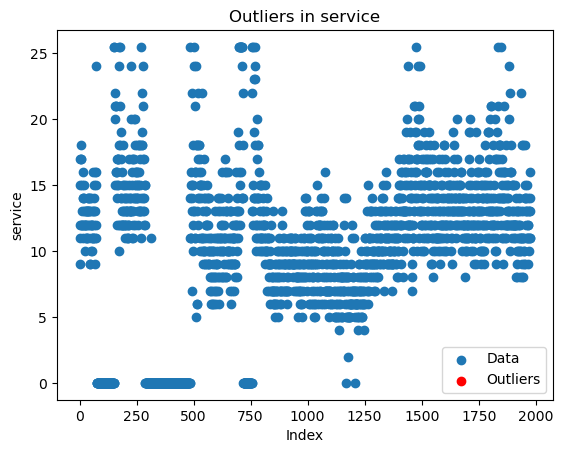

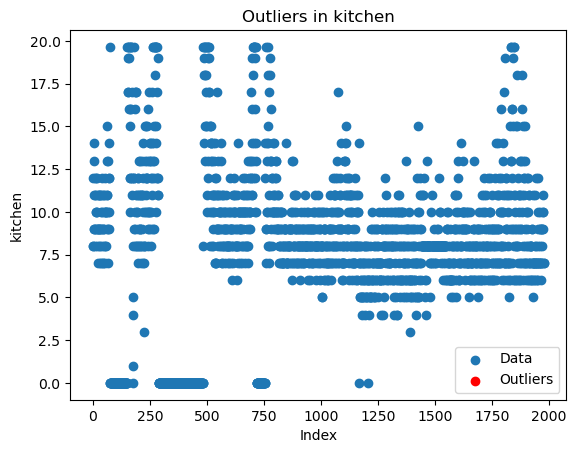

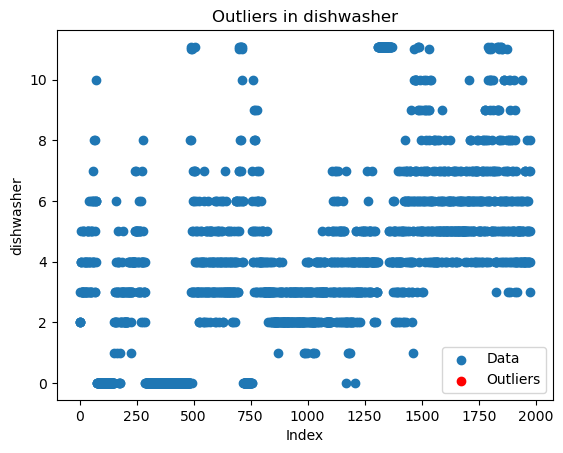

In [2249]:
# Outlier Detection with Z-scores
for col in columns:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = df[z_scores > 3]
    plt.scatter(df.index, df[col], label='Data')
    plt.scatter(outliers.index, outliers[col], color='r', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Outliers in {col}')
    plt.legend()
    plt.show()

In [2251]:
df

,date,service,kitchen,dishwasher
0,01/01/2020,17.0,12.0,3.0
1,02/01/2020,9.0,8.0,2.0
2,03/01/2020,15.0,8.0,2.0
3,04/01/2020,12.0,9.0,2.0
4,05/01/2020,11.0,9.0,2.0
...,...,...,...,...
1973,27/05/2025,16.0,10.0,8.0
1974,28/05/2025,13.0,10.0,7.0
1975,29/05/2025,14.0,11.0,5.0
1976,30/05/2025,11.0,7.0,3.0


In [2253]:
#creating total column
df['Total'] = df['service'] + df['kitchen'] + df['dishwasher']

In [2255]:
#Measures of Centrality
mean_total_percentage = df['Total'].mean()
median_total_percentage = df['Total'].median()
mode_total_percentage = df['Total'].mode()[0]

print(f"Mean of Total: {mean_total_percentage}")
print(f"Median of Total: {median_total_percentage}")
print(f"Mode of Total: {mode_total_percentage}")

Mean of Total: 21.717582998216123
Median of Total: 23.0
Mode of Total: 0.0


In [2257]:
#Measures of Dispersion
variance_total_percentage = df['Total'].var()
std_dev_total_percentage = df['Total'].std()
min_total_percentage = df['Total'].min()
max_total_percentage = df['Total'].max()
range_total_percentage = max_total_percentage - min_total_percentage
quantiles_total_percentage = df['Total'].quantile([0.25, 0.5, 0.75])

print(f"Variance of Total: {variance_total_percentage}")
print(f"Standard Deviation of Total: {std_dev_total_percentage}")
print(f"Minimum of Total: {min_total_percentage}")
print(f"Maximum of total: {max_total_percentage}")
print(f"Range of Total: {range_total_percentage}")
print("Quantiles of Total:")
print(quantiles_total_percentage)

Variance of Total: 135.25396869438546
Standard Deviation of Total: 11.62987397585999
Minimum of Total: 0.0
Maximum of total: 56.185946024238504
Range of Total: 56.185946024238504
Quantiles of Total:
0.25    18.0
0.50    23.0
0.75    28.0
Name: Total, dtype: float64


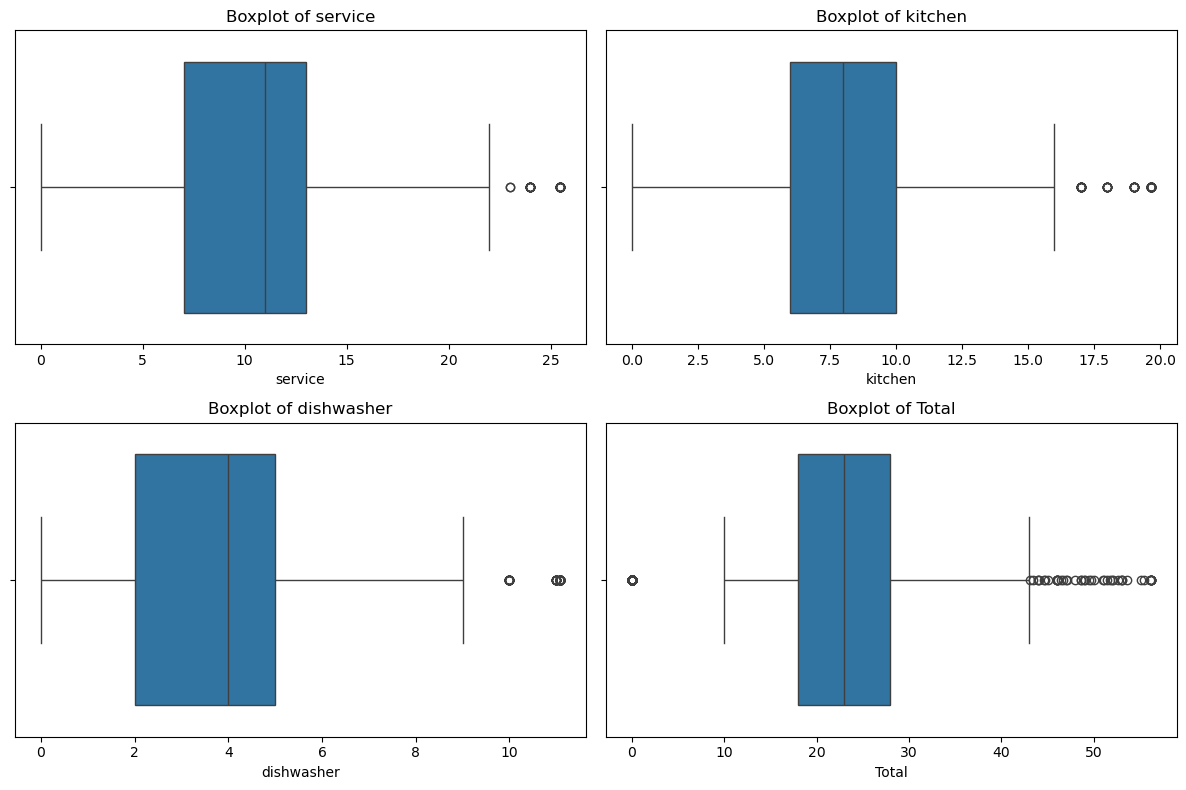

In [2259]:
# List of columns to visualize, Box plots
columns = ['service', 'kitchen', 'dishwasher','Total']

plt.figure(figsize=(12, 8))
for i, col in enumerate(columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [2261]:
skewness_total = df['Total'].skew()
kurtosis_total = df['Total'].kurtosis()

print(f"Skewness of Total: {skewness_total}")
print(f"Kurtosis of Total: {kurtosis_total}")

Skewness of Total: -0.3820653230761062
Kurtosis of Total: 0.24672062462911715


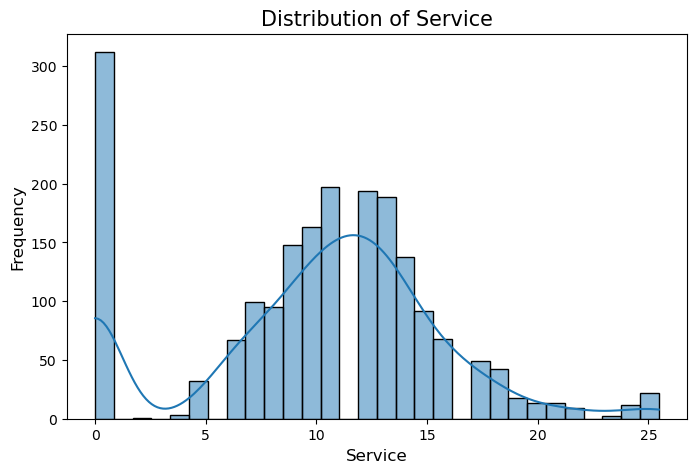

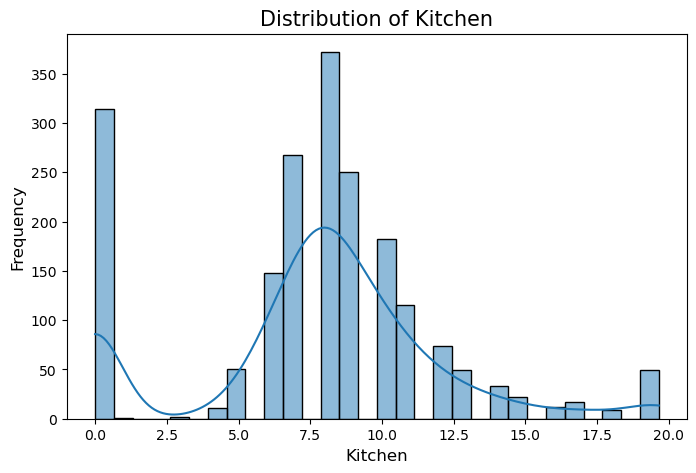

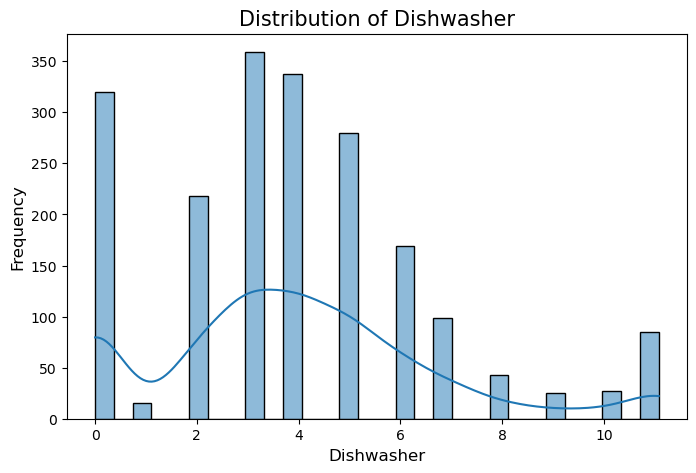

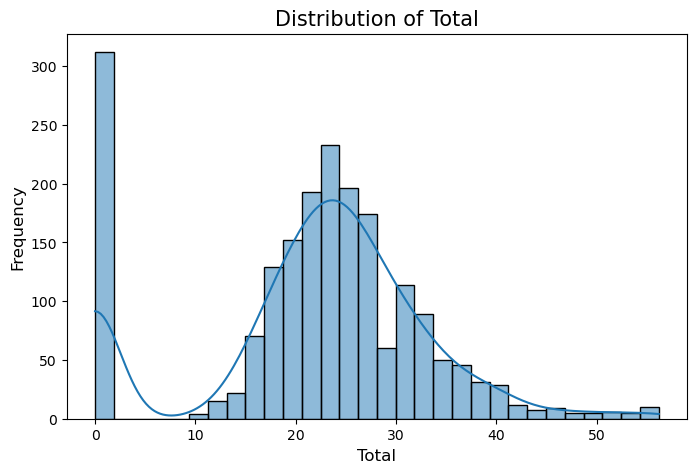

In [2263]:
#sns.histplot(df['Total'], kde=True, bins=30, color="red")
#plt.show()
columns_to_plot = ['service', 'kitchen', 'dishwasher','Total']

# Step 3: Loop through the columns and create a plot for each.
for column in columns_to_plot:
    plt.figure(figsize=(8, 5)) # Creates a new figure for each plot
    sns.histplot(data=df, x=column, kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}', fontsize=15)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

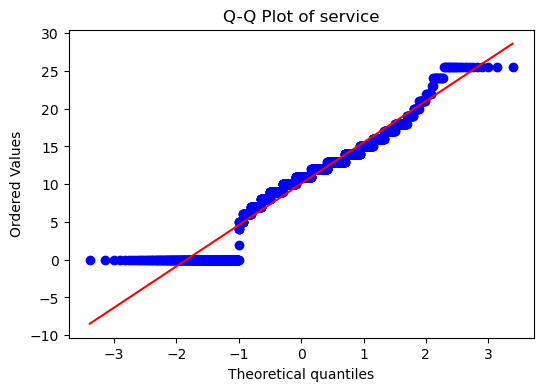

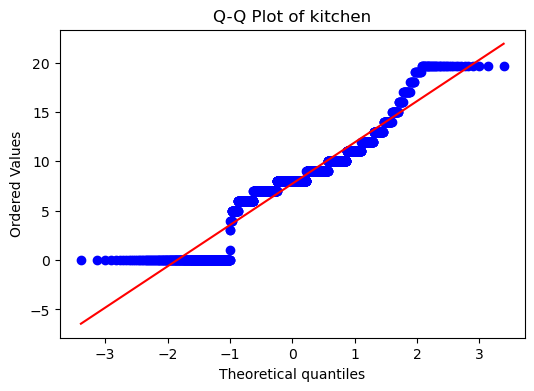

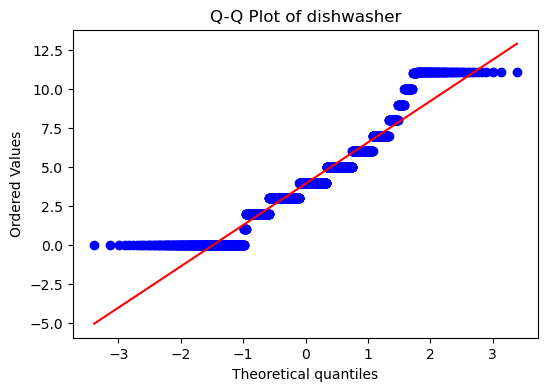

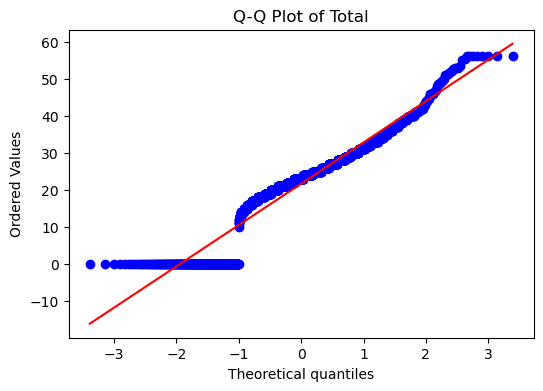

In [2265]:
# Generate Q-Q plot
numeric_cols = df.select_dtypes(include=['number']).columns

# Generate Q-Q plot for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    plt.show()

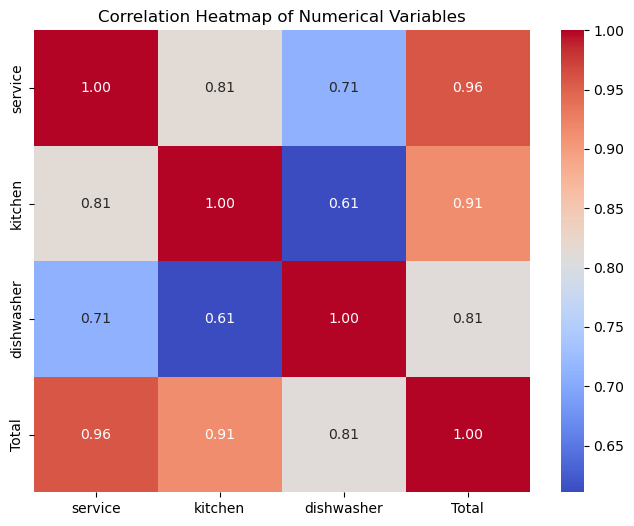

In [2267]:
# Select all numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()